<a href="https://colab.research.google.com/github/rgr-ro/rgr-projects/blob/master/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

(500, 1)


<function matplotlib.pyplot.show>

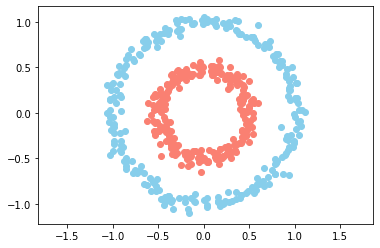

In [3]:
# CREATE THE DATASET

n = 500     #Num registers
p = 2       #Num characteristics of each register

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)
#print(Y)  #it is an array to classify the points generated in both circles, if it is 1 it belongs to the first circle and if it is 0 to the second

Y = Y [:, np.newaxis]
print(Y.shape)

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")
plt.axis("equal")     #Show both axes in the same proportion
plt.show

In [0]:
# NETWORK LAYER CLASS

class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):

    self.act_f = act_f

    self.b = np.random.rand(1, n_neur)      * 2 - 1
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1

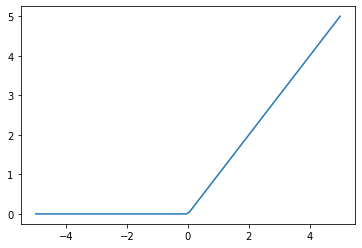

In [5]:
# ACTIVATION FUNCTIONS

sigm = (lambda x: 1 / (1 + np.e ** (-x)),     #function anonyme python (lambda)
        lambda x: x * (1 - x))                # <-this function occupies the pos [1] of the function and is its derivative

relu = lambda x: np.maximum(0, x)

_x = np.linspace(-5, 5, 100)                  #generates 100 values from -5 to 5 linearly
plt.plot(_x, relu(_x))

In [0]:
l0 = neural_layer(p, 4, sigm)
l1 = neural_layer(4, 8, sigm)
# ...

def create_nn(topology, act_f): 

  nn = []

  for l, layer in enumerate(topology[:-1]):

    nn.append(neural_layer(topology[l], topology[l + 1], act_f))

  return nn 

In [7]:
topology = [p, 4, 8, 1]

neural_net = create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2 ),         #Mean square error
           lambda Yp, Yr: (Yp - Yr))                        #The same as the last function

def train(neural_net, X, Y, l2_cost, lr=0.5, train = True):

  out = [(None, X)]

  # Forward pass

  for l, layer in enumerate(neural_net):

    z = out[-1][1] @ neural_net[l].W + neural_net[l].b    # Z = Weighted sum; @ is used to multiply matrix
    a = neural_net[l].act_f[0](z)                         # A = Activation 

    out.append((z, a))

  print(l2_cost[0](out[-1][1], Y))

  if train:

    # Backwatd pass
    deltas = []

    for l in reversed(range(0, len(neural_net))):

      z = out[l + 1][0]
      a = out[l + 1][1]

      print(a.shape)

      if l == len(neural_net) - 1:
        #Calculate delta last layer.
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
      else:
        #Calculate delta from previous layer.
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))
        
      _W = neural_net[l].W

      # Gradient descent
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr

  return out[-1][1]



train(neural_net, X, Y, l2_cost, 0.5)
print("")


0.2507404301902443
(500, 1)
(500, 8)
(500, 4)



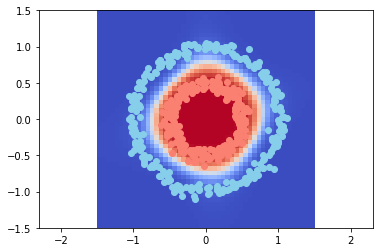

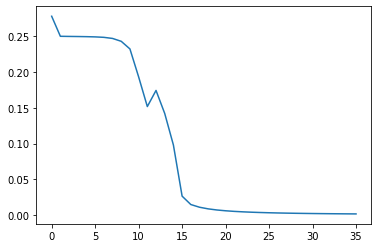

KeyboardInterrupt: ignored

In [9]:
# VISUALIZATION AND TEST

import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(2500):
    
  # We train the neural network!
  pY = train(neural_n, X, Y, l2_cost, lr=0.05)
  
  if i % 25 == 0:
    
    print(pY)
  
    loss.append(l2_cost[0](pY, Y))
  
    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]    

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)  